# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Среднее специальное', 'Неоконченное высшее', 'Ученая степень', 'Два и более высших образования', 'Среднее', 'Неполное среднее'}


MARITAL_STATUS
{'Не состоял в браке', 'Вдовец/Вдова', 'Состою в браке', 'Гражданский брак', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Туризм', 'Транспорт', 'Салоны красоты и здоровья', 'Другие сферы', 'Информационные технологии', 'Банк/Финансы', 'Коммунальное хоз-во/Дорожные службы', 'Энергетика', 'ЧОП/Детективная д-ть', 'Информационные услуги', 'Сборочные производства', 'Государственная служба', 'Торговля', 'Химия/Парфюмерия/Фармацевтика', 'Подбор персонала', 'Развлечения/Искусство', 'Недвижимость', 'Нефтегазовая промышленность', 'Сельское хозяйство', 'Образование', 'Ресторанный бизнес/Общественное питание', 'Логистика', 'Юридические услуги/нотариальные услуги', 'Управляющая компания', 'СМИ/Реклама/PR-агенства', 'Страхование', 'Металлургия/Промышленность/Машиностроение', 'Здравоохранение', 'Наука', 'Строительство', 'Маркетинг'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

In [15]:
# Меняем все запятые на точки и формат на float
"""
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
"""

"\ndf['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')\ndf['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')\ndf['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')\ndf['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')\ndf['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')\n"

In [16]:
# Теперь снова прогоняем цикл с целью проверить, что у нас в итоге осталось строкового типа
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Среднее специальное', 'Неоконченное высшее', 'Ученая степень', 'Два и более высших образования', 'Среднее', 'Неполное среднее'}


MARITAL_STATUS
{'Не состоял в браке', 'Вдовец/Вдова', 'Состою в браке', 'Гражданский брак', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Туризм', 'Транспорт', 'Салоны красоты и здоровья', 'Другие сферы', 'Информационные технологии', 'Банк/Финансы', 'Коммунальное хоз-во/Дорожные службы', 'ЧОП/Детективная д-ть', 'Энергетика', 'Информационные услуги', 'Сборочные производства', 'Государственная служба', 'Торговля', 'Химия/Парфюмерия/Фармацевтика', 'Подбор персонала', 'Развлечения/Искусство', 'Недвижимость', 'Нефтегазовая промышленность', 'Сельское хозяйство', 'Образование', 'Ресторанный бизнес/Общественное питание', 'Логистика', 'Управляющая компания', 'Юридические услуги/нотариальные услуги', 'СМИ/Реклама/PR-агенства', 'Страхование', 'Металлургия/Промышленность/Машиностроение', 'Здравоохранение', 'Наука', 'Строительство', 'Маркетинг'}


GEN_TITLE


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [18]:
# В этой ячейке я смотрю какие данные есть в столбцах с пропусками, чтобы ответить на следующий вопрос =)
df[['GEN_TITLE', 'GENDER']].groupby('GEN_TITLE').count()

,GENDER
GEN_TITLE,
Военнослужащий по контракту,158
Высококвалифиц. специалист,1082
Другое,355
Индивидуальный предприниматель,436
Партнер,17
Работник сферы услуг,1118
Рабочий,6025
Руководитель высшего звена,841
Руководитель низшего звена,268


In [19]:
df[['FACT_ADDRESS_PROVINCE', 'REGION_NM']][df['REGION_NM'].isnull()]

,FACT_ADDRESS_PROVINCE,REGION_NM
3099,Новосибирская область,NaN
17420,Новосибирская область,NaN


### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [20]:
"""
Список полей с пропусками:
GEN_INDUSTRY                  27420 non-null object - нет смысла заполнять и проще удалить, 
т.к.категориальный признак, который сложно обработать и слабо влияющий на предикт 

GEN_TITLE                     27420 non-null object - можно пропуски заполнять значением "другое" (вполне соответствует =)
Осавлю это атрибут (не буду удалять) - возможно ещё пригодиться, 
т.к. возможно, по должности получится определить готовность человека к диалогу 

ORG_TP_STATE                  27420 non-null object - проще удалить (скорее всего не влияет на предикт)

ORG_TP_FCAPITAL               27425 non-null object - проще удалить (скорее всего не влияет на предикт)

JOB_DIR                       27420 non-null object - нет смысла заполнять и проще удалить, 
т.к.категориальный признак, который сложно обработать и скорее всего не вильно влияющий на предикт
похож на GEN_TITLE, который мы оставили в живых

TP_PROVINCE                   29543 non-null object - можно заполнить на основе FACT_ADDRESS_PROVINCE, 
т.к.скорее всего человек работает там же, где и живёт. Но сами данные скорее всего имеют низкую ценность для предикта, 
поэтому проще удалить

REGION_NM                     30131 non-null object - надеюсь, что пригодиться. А поскольку пропущено только 2 значения -
мы их посмотрели, оба из Новосиба, а поэтому обоих заполняем значением 'ЗАПАДНО-СИБИРСКИЙ'

WORK_TIME                     27416 non-null float64 - можно скоррелировать с возрастом, но проще удалить, 
т.к. низкая ценность для предикта

PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64 - слишком много пропусков + 
+ атрибут никак не соотносится с предметом предикта, поэтому проще и лучше его удалить и про него забыть =)

"""
# Мужик сказал - мужик сделал: удаляем выбранные столбцы
"""
df = df.drop(['GEN_INDUSTRY', 
              'ORG_TP_STATE', 
              'ORG_TP_FCAPITAL', 
              'JOB_DIR', 
              'TP_PROVINCE', 
              'WORK_TIME', 
              'PREVIOUS_CARD_NUM_UTILIZED'], axis=1)
"""

"\ndf = df.drop(['GEN_INDUSTRY', \n              'ORG_TP_STATE', \n              'ORG_TP_FCAPITAL', \n              'JOB_DIR', \n              'TP_PROVINCE', \n              'WORK_TIME', \n              'PREVIOUS_CARD_NUM_UTILIZED'], axis=1)\n"

In [21]:
# Пропуски в столбце должность заполняем значением "другое"
"""
df['GEN_TITLE'] = df['GEN_TITLE'].fillna('Другое')
"""

"\ndf['GEN_TITLE'] = df['GEN_TITLE'].fillna('Другое')\n"

In [22]:
# Пропуски в столбце регион РФ заполняем значением "ЗАПАДНО-СИБИРСКИЙ"
"""
df['REGION_NM'] = df['REGION_NM'].fillna('ЗАПАДНО-СИБИРСКИЙ')
"""

"\ndf['REGION_NM'] = df['REGION_NM'].fillna('ЗАПАДНО-СИБИРСКИЙ')\n"

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [23]:
"""
А Вы сомневались? Конечно есть! Куча!
Вместо всех адресов используем регион РФ. Он менее точный, но с ним проще работать - меньше фич получится при ванХотЭнкодинг)

Оставляем:
REGION_NM

Удаляем адреса: 
REG_ADDRESS_PROVINCE
FACT_ADDRESS_PROVINCE
POSTAL_ADDRESS_PROVINCE
TP_PROVINCE - уже удалили
REG_FACT_FL
FACT_POST_FL
REG_POST_FL
REG_FACT_POST_FL
REG_FACT_POST_TP_FL

MARITAL_STATUS, GEN_TITLE и REGION_NM - запихиваем в ванХотЭнкодинг)
FAMILY_INCOME - заменяем на среднее значение для отрезка

EDUCATION - используем значения от 1 до 7 (чем выше значение, тем выше образование)
Неполное среднее = 1
Среднее = 2
Среднее специальное = 3
Неоконченное высшее = 4
Высшее = 5
Два и более высших образования = 6
Ученая степень = 7

"""
"""
df = df.drop(['REG_ADDRESS_PROVINCE', 
              'FACT_ADDRESS_PROVINCE', 
              'POSTAL_ADDRESS_PROVINCE', 
              'REG_FACT_FL', 
              'FACT_POST_FL', 
              'REG_POST_FL', 
              'REG_FACT_POST_FL', 
              'REG_FACT_POST_TP_FL'], axis=1)
"""

"\ndf = df.drop(['REG_ADDRESS_PROVINCE', \n              'FACT_ADDRESS_PROVINCE', \n              'POSTAL_ADDRESS_PROVINCE', \n              'REG_FACT_FL', \n              'FACT_POST_FL', \n              'REG_POST_FL', \n              'REG_FACT_POST_FL', \n              'REG_FACT_POST_TP_FL'], axis=1)\n"

In [24]:
# Здесь мы все категориальные значения семейного дохода конвертируем в среднее по отрезку
"""
df['FAMILY_INCOME'][df['FAMILY_INCOME'] == 'до 5000 руб.'] = 2500
df['FAMILY_INCOME'][df['FAMILY_INCOME'] == 'от 5000 до 10000 руб.'] = 7500
df['FAMILY_INCOME'][df['FAMILY_INCOME'] == 'от 10000 до 20000 руб.'] = 15000
df['FAMILY_INCOME'][df['FAMILY_INCOME'] == 'от 20000 до 50000 руб.'] = 35000
df['FAMILY_INCOME'][df['FAMILY_INCOME'] == 'свыше 50000 руб.'] = 75000
"""

"\ndf['FAMILY_INCOME'][df['FAMILY_INCOME'] == 'до 5000 руб.'] = 2500\ndf['FAMILY_INCOME'][df['FAMILY_INCOME'] == 'от 5000 до 10000 руб.'] = 7500\ndf['FAMILY_INCOME'][df['FAMILY_INCOME'] == 'от 10000 до 20000 руб.'] = 15000\ndf['FAMILY_INCOME'][df['FAMILY_INCOME'] == 'от 20000 до 50000 руб.'] = 35000\ndf['FAMILY_INCOME'][df['FAMILY_INCOME'] == 'свыше 50000 руб.'] = 75000\n"

In [25]:
# Здесь мы все категориальные значения образования конвертируем в цифру
"""
df['EDUCATION'][df['EDUCATION'] == 'Неполное среднее'] = 1
df['EDUCATION'][df['EDUCATION'] == 'Среднее'] = 2
df['EDUCATION'][df['EDUCATION'] == 'Среднее специальное'] = 3
df['EDUCATION'][df['EDUCATION'] == 'Неоконченное высшее'] = 4
df['EDUCATION'][df['EDUCATION'] == 'Высшее'] = 5
df['EDUCATION'][df['EDUCATION'] == 'Два и более высших образования'] = 6
df['EDUCATION'][df['EDUCATION'] == 'Ученая степень'] = 7
"""

"\ndf['EDUCATION'][df['EDUCATION'] == 'Неполное среднее'] = 1\ndf['EDUCATION'][df['EDUCATION'] == 'Среднее'] = 2\ndf['EDUCATION'][df['EDUCATION'] == 'Среднее специальное'] = 3\ndf['EDUCATION'][df['EDUCATION'] == 'Неоконченное высшее'] = 4\ndf['EDUCATION'][df['EDUCATION'] == 'Высшее'] = 5\ndf['EDUCATION'][df['EDUCATION'] == 'Два и более высших образования'] = 6\ndf['EDUCATION'][df['EDUCATION'] == 'Ученая степень'] = 7\n"

In [26]:
"""
df['EDUCATION'] = df['EDUCATION'].astype('int') 
"""
# Меняю формат со стрингового на integer

"\ndf['EDUCATION'] = df['EDUCATION'].astype('int') \n"

In [27]:
"""
df['FAMILY_INCOME'] = df['FAMILY_INCOME'].astype('int')
"""
# Меняю формат со стрингового на integer

"\ndf['FAMILY_INCOME'] = df['FAMILY_INCOME'].astype('int')\n"

In [28]:
# Закодируем семейное положение, должность и регион с помощью OneHotEncoding
"""
df = pd.get_dummies(df, columns=['MARITAL_STATUS', 'GEN_TITLE', 'REGION_NM'])
"""

"\ndf = pd.get_dummies(df, columns=['MARITAL_STATUS', 'GEN_TITLE', 'REGION_NM'])\n"

In [29]:
# df.info()

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [30]:

# Нужно выполнять либо эту функцию, либо те строки, которые я выполнял выше, когда наводил порядок
def preproc_data(df_input):
    df_output = df_input.copy()
    # флотируем стринговые столбцы
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    # Удаляем лишние данные с пропусками
    df_output = df_output.drop(['GEN_INDUSTRY', 
              'ORG_TP_STATE', 
              'ORG_TP_FCAPITAL', 
              'JOB_DIR', 
              'TP_PROVINCE', 
              'WORK_TIME', 
              'PREVIOUS_CARD_NUM_UTILIZED'], axis=1)
    
    df_output['GEN_TITLE'] = df_output['GEN_TITLE'].fillna('Другое')
    df_output['REGION_NM'] = df_output['REGION_NM'].fillna('ЗАПАДНО-СИБИРСКИЙ')
    # Удаляем лишние данные с категориальными признаками
    df_output = df_output.drop(['REG_ADDRESS_PROVINCE', 
              'FACT_ADDRESS_PROVINCE', 
              'POSTAL_ADDRESS_PROVINCE', 
              'REG_FACT_FL', 
              'FACT_POST_FL', 
              'REG_POST_FL', 
              'REG_FACT_POST_FL', 
              'REG_FACT_POST_TP_FL'], axis=1)
    # Здесь мы все категориальные значения семейного дохода и образования конвертируем в цифру
    df_output['FAMILY_INCOME'][df_output['FAMILY_INCOME'] == 'до 5000 руб.'] = 2500
    df_output['FAMILY_INCOME'][df_output['FAMILY_INCOME'] == 'от 5000 до 10000 руб.'] = 7500
    df_output['FAMILY_INCOME'][df_output['FAMILY_INCOME'] == 'от 10000 до 20000 руб.'] = 15000
    df_output['FAMILY_INCOME'][df_output['FAMILY_INCOME'] == 'от 20000 до 50000 руб.'] = 35000
    df_output['FAMILY_INCOME'][df_output['FAMILY_INCOME'] == 'свыше 50000 руб.'] = 75000
    
    df_output['EDUCATION'][df_output['EDUCATION'] == 'Неполное среднее'] = 1
    df_output['EDUCATION'][df_output['EDUCATION'] == 'Среднее'] = 2
    df_output['EDUCATION'][df_output['EDUCATION'] == 'Среднее специальное'] = 3
    df_output['EDUCATION'][df_output['EDUCATION'] == 'Неоконченное высшее'] = 4
    df_output['EDUCATION'][df_output['EDUCATION'] == 'Высшее'] = 5
    df_output['EDUCATION'][df_output['EDUCATION'] == 'Два и более высших образования'] = 6
    df_output['EDUCATION'][df_output['EDUCATION'] == 'Ученая степень'] = 7
    # Меняю формат со стрингового на integer
    df_output['EDUCATION'] = df_output['EDUCATION'].astype('int')
    df_output['FAMILY_INCOME'] = df_output['FAMILY_INCOME'].astype('int')
    # Закодируем семейное положение, должность и регион с помощью OneHotEncoding
    df_output = pd.get_dummies(df_output, columns=['MARITAL_STATUS', 'GEN_TITLE', 'REGION_NM'])
    
    ## Your Code Here
    
    return df_output
    


In [31]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [32]:
y = df_train_preproc['TARGET']
X = df_train_preproc.drop('TARGET', axis=1)
y_t = df_test_preproc['TARGET']
X_t = df_test_preproc.drop('TARGET', axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [33]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
# DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=123)
model.fit(X,y)
predict = model.predict(X_test)
predict_proba = model.predict_proba(X_test)

# RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1000)
model1.fit(X,y)
predict1 = model1.predict(X_test)
predict_proba1 = model1.predict_proba(X_test)

# LogisticRegression
model2 = LogisticRegression()
model2.fit(X,y)
predict2 = model2.predict(X_test)
predict_proba2 = model2.predict_proba(X_test)

In [36]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print('DecisionTreeClassifier')
print('accuracy', accuracy_score(y_test, predict))
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('RandomForestClassifier')
print('accuracy', accuracy_score(y_test, predict1))
print('precision', precision_score(y_test, predict1))
print('recall', recall_score(y_test, predict1))
print('LogisticRegression')
print('accuracy', accuracy_score(y_test, predict2))
print('precision', precision_score(y_test, predict2))
print('recall', recall_score(y_test, predict2))

DecisionTreeClassifier
accuracy 0.7827895774031093
precision 0.15151515151515152
recall 0.17117117117117117
RandomForestClassifier
accuracy 0.8782570615283556
precision 0.0
recall 0.0
LogisticRegression
accuracy 0.8784760236479089
precision 0.0
recall 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
# DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=123)
model.fit(X,y)
predict = model.predict(X_test)
predict_proba = model.predict_proba(X_test)
print('DecisionTreeClassifier')
print('accuracy', accuracy_score(y_test, predict))
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))

DecisionTreeClassifier
accuracy 0.7827895774031093
precision 0.15151515151515152
recall 0.17117117117117117


In [38]:
# RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1000)
model1.fit(X,y)
predict1 = model1.predict(X_test)
predict_proba1 = model1.predict_proba(X_test)
print('RandomForestClassifier')
print('accuracy', accuracy_score(y_test, predict1))
print('precision', precision_score(y_test, predict1))
print('recall', recall_score(y_test, predict1))

RandomForestClassifier
accuracy 0.8782570615283556
precision 0.0
recall 0.0


In [39]:
# LogisticRegression
model2 = LogisticRegression()
model2.fit(X,y)
predict2 = model2.predict(X_test)
predict_proba2 = model2.predict_proba(X_test)
print('LogisticRegression')
print('accuracy', accuracy_score(y_test, predict2))
print('precision', precision_score(y_test, predict2))
print('recall', recall_score(y_test, predict2))

LogisticRegression
accuracy 0.8784760236479089
precision 0.0
recall 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here

(-0.01, 1.01)

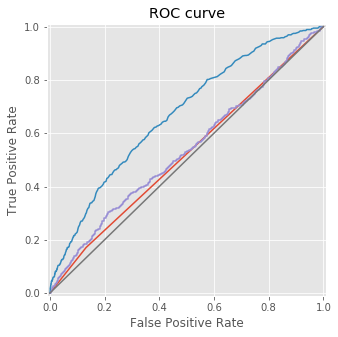

In [50]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, predict_proba1[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_proba2[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot([0, 1], [0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))


In [48]:
print('DecisionTreeClassifier', roc_auc_score(y_test, predict_proba[:,1]))
print('RandomForestClassifier', roc_auc_score(y_test, predict_proba1[:,1]))
print('LogisticRegression', roc_auc_score(y_test, predict_proba2[:,1]))

DecisionTreeClassifier 0.5192844888757152
RandomForestClassifier 0.6680501288926015
LogisticRegression 0.5331873748124994


In [51]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
dtc = DecisionTreeClassifier(random_state=123)
cross_val_score(
    dtc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
## Your Code Here

array([0.51848193, 0.52641844, 0.52850388, 0.52555724, 0.56049477,
       0.50440729, 0.53480243, 0.51110638, 0.4927234 , 0.52997231])

In [52]:
rfc = RandomForestClassifier(n_estimators=1000)
cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.68689632, 0.68007852, 0.6600895 , 0.64628082, 0.67095154,
       0.66127575, 0.66668355, 0.65905106, 0.66793617, 0.63190628])

In [53]:
lr = LogisticRegression()
cross_val_score(
    lr,
    X,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.52117528, 0.56366093, 0.51057075, 0.51134752, 0.565282  ,
       0.54771192, 0.52001013, 0.5800766 , 0.57316596, 0.54294356])

In [54]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

predict3 = model1.predict(X_t)
predict_proba3 = model1.predict_proba(X_t)
## Your Code Here

(-0.01, 1.01)

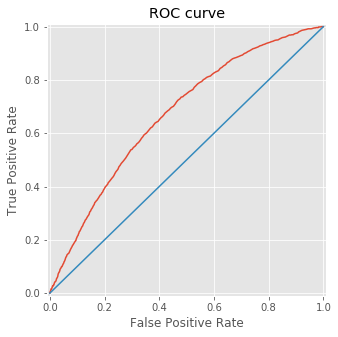

In [55]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_t, predict_proba3[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [56]:
print('RandomForestClassifier', roc_auc_score(y_t, predict_proba3[:,1]))

RandomForestClassifier 0.6702074902301346


### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)